In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

data = pd.read_csv('Udemy Courses.csv', nrows=1000)

data.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments


In [2]:
data['price'] = pd.to_numeric(data['price'], errors='coerce')
imputer = SimpleImputer(strategy='mean')
data['price'] = imputer.fit_transform(data[['price']])

data['content_duration'] = data['content_duration'].str.extract('(\d+\.?\d*)').astype(float)

scaler = StandardScaler()
numerical_columns = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

data = pd.get_dummies(data, columns=['subject'])

level_map = {'All Levels': 0, 'Beginner Level': 1, 'Intermediate Level': 2, 'Expert Level': 3}
data['level'] = data['level'].map(level_map)

data.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject_Business Finance,subject_Graphic Design,subject_Musical Instruments,subject_Web Development
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,-0.614441,0.003868,-0.160546,0.418013,0,-0.537274,2014-09-18T05:07:05Z,False,False,True,False
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,0.087124,-0.161282,-0.181868,-0.038388,2,-0.583191,2017-04-12T19:06:34Z,False,False,True,False
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,0.087124,-0.280117,-0.181868,0.063034,2,-0.537274,2017-04-26T18:34:57Z,False,False,True,False
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,0.087124,-0.240755,-0.179360,-0.004581,2,-0.583191,2017-02-21T23:48:18Z,False,False,True,False
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,0.087124,-0.231128,-0.179360,-0.190522,2,2.722827,2017-02-21T23:44:49Z,False,False,True,False


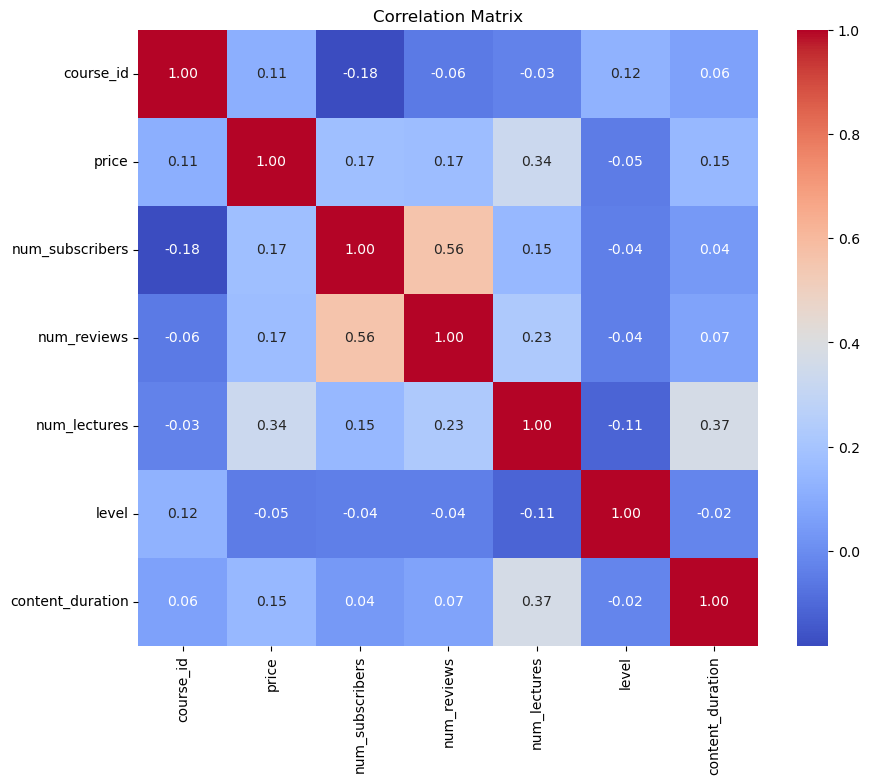

In [3]:
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

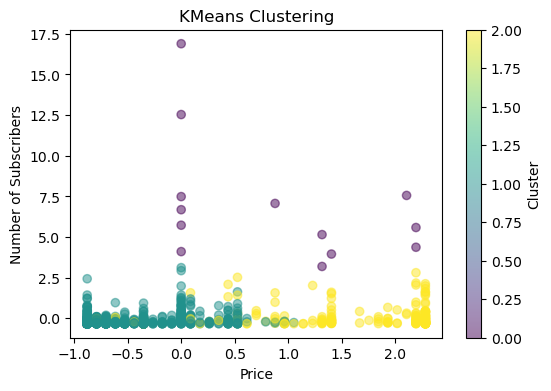

In [4]:
cluster_features = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']

kmeans = KMeans(n_clusters=3, random_state=42)
data['kmeans_cluster'] = kmeans.fit_predict(data[cluster_features])

plt.figure(figsize=(6, 4))
plt.scatter(data['price'], data['num_subscribers'], c=data['kmeans_cluster'], cmap='viridis', alpha=0.5)
plt.title('KMeans Clustering')
plt.xlabel('Price')
plt.ylabel('Number of Subscribers')
plt.colorbar(label='Cluster')
plt.show()

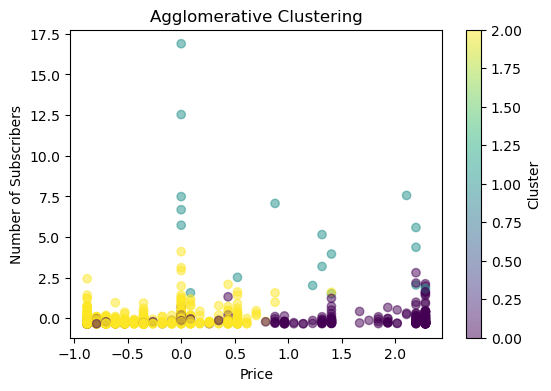

In [5]:
agg_clustering = AgglomerativeClustering(n_clusters=3)
data['agg_cluster'] = agg_clustering.fit_predict(data[cluster_features])

plt.figure(figsize=(6, 4))
plt.scatter(data['price'], data['num_subscribers'], c=data['agg_cluster'], cmap='viridis', alpha=0.5)
plt.title('Agglomerative Clustering')
plt.xlabel('Price')
plt.ylabel('Number of Subscribers')
plt.colorbar(label='Cluster')
plt.show()

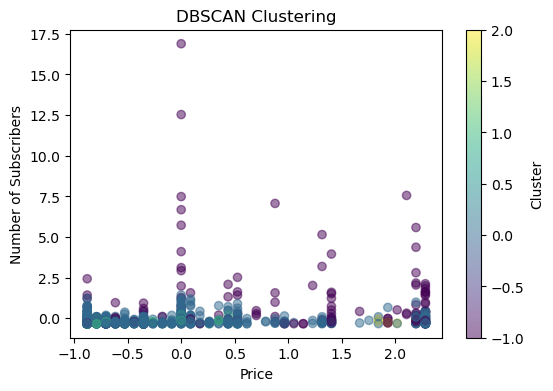

In [6]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['dbscan_cluster'] = dbscan.fit_predict(data[cluster_features])

plt.figure(figsize=(6, 4))
plt.scatter(data['price'], data['num_subscribers'], c=data['dbscan_cluster'], cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('Price')
plt.ylabel('Number of Subscribers')
plt.colorbar(label='Cluster')
plt.show()

In [7]:
X = data.drop(['is_paid', 'published_timestamp', 'course_title', 'course_id'], axis=1)
y = data['is_paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_y_pred = logistic_model.predict(X_test)
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, logistic_y_pred))
logistic_conf_matrix = confusion_matrix(y_test, logistic_y_pred)


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

       False       0.33      0.05      0.09        19
        True       0.91      0.99      0.95       181

    accuracy                           0.90       200
   macro avg       0.62      0.52      0.52       200
weighted avg       0.85      0.90      0.87       200



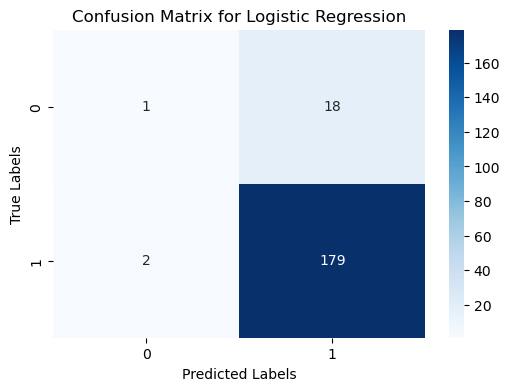

In [9]:
plt.figure(figsize=(6, 4))
sns.heatmap(logistic_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [10]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
random_forest_y_pred = random_forest_model.predict(X_test)
print("Classification Report for Random Forest:")
print(classification_report(y_test, random_forest_y_pred))
random_forest_conf_matrix = confusion_matrix(y_test, random_forest_y_pred)

Classification Report for Random Forest:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        19
        True       1.00      1.00      1.00       181

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



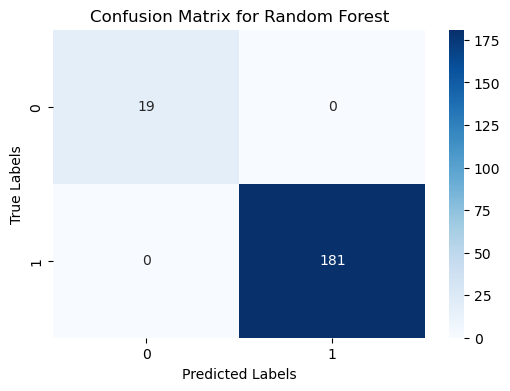

In [11]:
plt.figure(figsize=(6, 4))
sns.heatmap(random_forest_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [12]:
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
print("Classification Report for SVM:")
print(classification_report(y_test, svm_y_pred))
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)

Classification Report for SVM:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        19
        True       0.90      0.99      0.95       181

    accuracy                           0.90       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.82      0.90      0.86       200



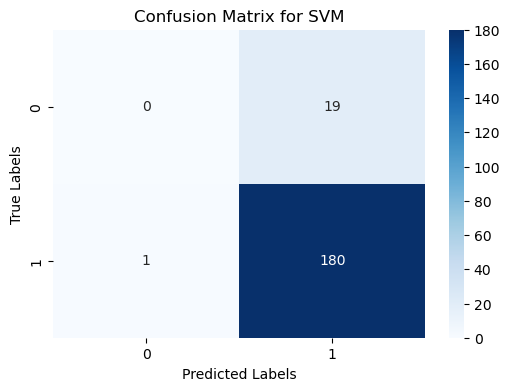

In [13]:
plt.figure(figsize=(6, 4))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

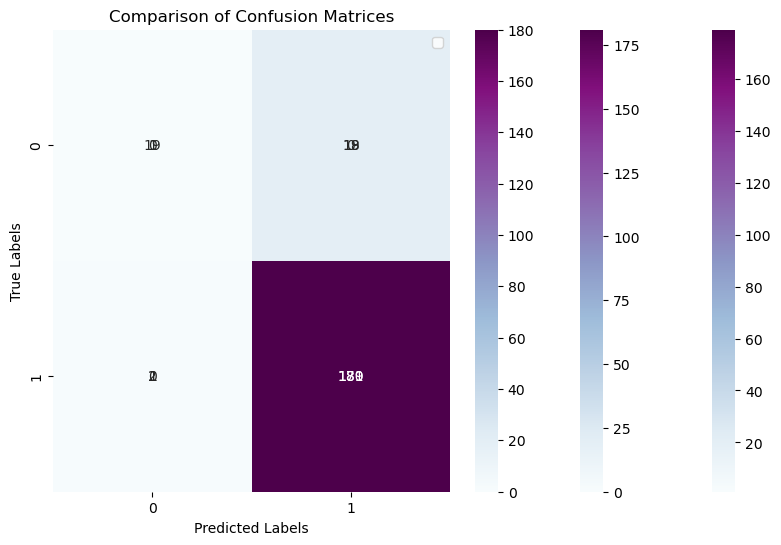

In [14]:
model_names = ['Logistic Regression', 'Random Forest', 'SVM']
conf_matrices = [logistic_conf_matrix, random_forest_conf_matrix, svm_conf_matrix]

plt.figure(figsize=(10, 6))
for i in range(len(model_names)):
    sns.heatmap(conf_matrices[i], annot=True, fmt='d', cmap='BuPu', ax=plt.gca())
plt.title('Comparison of Confusion Matrices')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.legend(model_names)
plt.show()
